In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
num_points = 50
hours_studied = np.random.uniform(1, 10, num_points)  # Average hours studied (1 to 10)
marks_obtained = np.random.randint(0, 101, num_points)  # Marks obtained (0 to 100)

# Create DataFrame
data = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Marks_Obtained': marks_obtained
})

# Display the first 10 rows of the dataset
data.head(10)


,Hours_Studied,Marks_Obtained
0,4.370861,62
1,9.556429,17
2,7.587945,89
3,6.387926,43
4,2.404168,33
5,2.403951,73
6,1.522753,61
7,8.795585,99
8,6.410035,13
9,7.372653,94


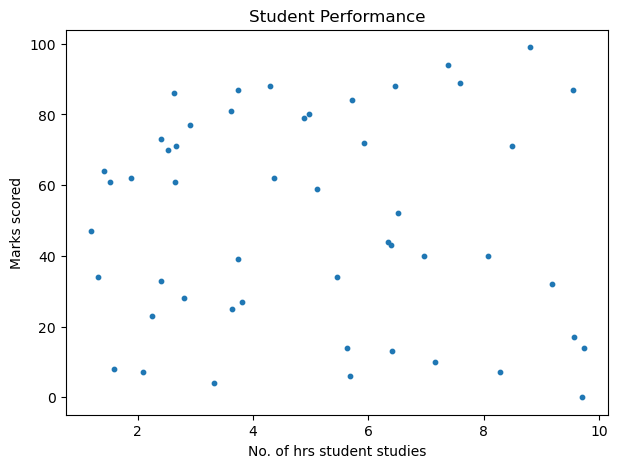

In [77]:
plt.figure(figsize=(7,5))
plt.scatter(hours_studied,marks_obtained,s=10)
plt.xlabel('No. of hrs student studies')
plt.ylabel('Marks scored')
plt.title('Student Performance')
plt.show()

Now, we rescale the data.

In [13]:
scaler=StandardScaler()
features=scaler.fit_transform(data)

#convert to panda dataframe
scaled_data=pd.DataFrame(features,columns=data.columns)

scaled_data.head()

,Hours_Studied,Marks_Obtained
0,-0.249611,0.418550
1,1.765126,-1.115223
2,1.000316,1.338813
3,0.534075,-0.229043
4,-1.013726,-0.569882


In [34]:
X=scaled_data.values

In [35]:
from sklearn.cluster import KMeans

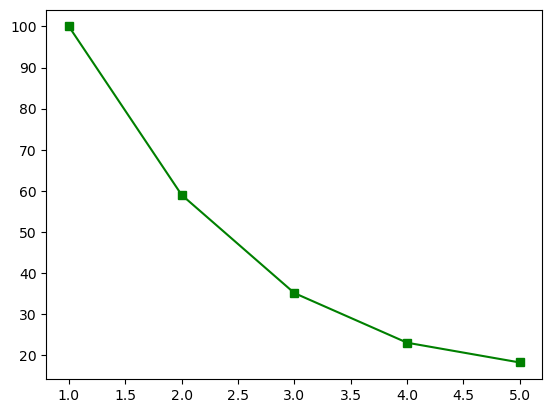

In [38]:
wcss={}

for i in range(1,6):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss[i]=kmeans.inertia_

plt.plot(wcss.keys(),wcss.values(),'gs-')
plt.show()

Implementing K-Means:

Let’s perform the K-Means clustering for n_clusters=4.

In [39]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)


KMeans(n_clusters=4)

In [63]:
centers=kmeans.cluster_centers_
#centers

In [64]:
kmeans.labels_

array([2, 1, 3, 1, 0, 2, 2, 3, 1, 3, 2, 1, 3, 2, 2, 2, 0, 3, 3, 2, 1, 0,
       0, 3, 3, 1, 0, 1, 1, 2, 3, 2, 0, 3, 1, 1, 2, 2, 1, 3, 0, 1, 0, 1,
       0, 1, 0, 1, 3, 2], dtype=int32)

In [48]:
original_centers = scaler.inverse_transform(centers)


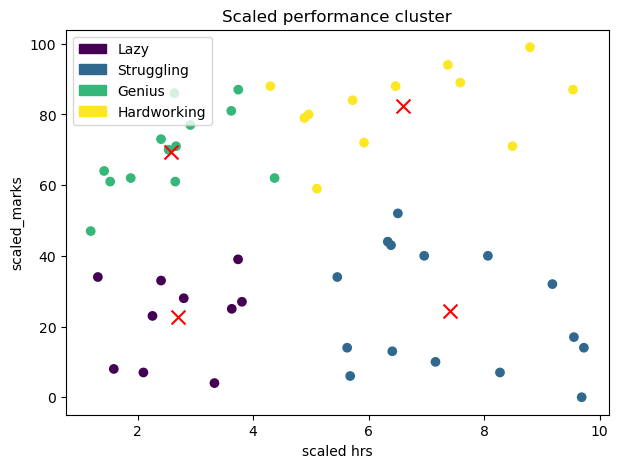

In [76]:
plt.figure(figsize=(7, 5))
scatter = plt.scatter(data.values[:, 0], data.values[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(original_centers[:, 0], original_centers[:, 1], c='red', marker='x', s=100)



# Creating custom legend with matching colors
cluster_label = ['Lazy', 'Struggling', 'Genius', 'Hardworking']
unique_labels = sorted(set(kmeans.labels_))
patches = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=cluster_label[i]) 
           for i in unique_labels]
plt.legend(handles=patches)

plt.xlabel('scaled hrs')
plt.ylabel('scaled_marks')
plt.title('Scaled performance cluster')
plt.show()
